<h1 align="center">Lead Scoring Case Study</h1> 

#### Supress Warnings and Import Required Libraries 

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [5]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Step 1: Reading and Understanding the Data

In [6]:
# Check the dataset

lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Inspect various aspects of lead_df dataframe

In [7]:
# Shape of the dataframe

lead_df.shape

(9240, 37)

In [8]:
# Datatypes of the dataframe

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
# Null values in the dataset

lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Statistical summary of the data

lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 2: Data Cleaning

There are 'Select' values in many columns which are as good as null hence, we will convert those values into null values.

In [11]:
# Convert 'select' values to NaN

lead_df = lead_df.replace('Select', np.NAN)

In [12]:
# Percentange of null values in dataset

round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
# Drop columns with missing values more than 30%

lead_df = lead_df.drop(columns=['Specialization','How did you hear about X Education','Specialization','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index',
                                'Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1)

In [14]:
# Percentange of null values in dataset after dropping columns with missing values more than 30% 

round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### Dealing with Null Values

In [15]:
# Column: Specialization

round(lead_df['Country'].value_counts(normalize=True),2)*100

Country
India                   96.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Hong Kong                0.0
Bahrain                  0.0
Oman                     0.0
France                   0.0
unknown                  0.0
South Africa             0.0
Nigeria                  0.0
Germany                  0.0
Kuwait                   0.0
Canada                   0.0
Sweden                   0.0
China                    0.0
Asia/Pacific Region      0.0
Uganda                   0.0
Bangladesh               0.0
Italy                    0.0
Belgium                  0.0
Netherlands              0.0
Ghana                    0.0
Philippines              0.0
Russia                   0.0
Switzerland              0.0
Vietnam                  0.0
Denmark                  0.0
Tanzania                 0.0
Liberia                  0.0
Malays

In [16]:
# Impute the missing data in the 'Country' column with 'India'

lead_df['Country'] = lead_df['Country'].replace(np.NAN,'India')

In [17]:
# Column: What is your current occupation

round(lead_df['What is your current occupation'].value_counts(normalize=True),2)*100

What is your current occupation
Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: proportion, dtype: float64

In [18]:
# Impute the missing data in the 'What is your current occupation' column with 'Unemployed'

lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [19]:
# Column: What matters most to you in choosing a course

round(lead_df['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

What matters most to you in choosing a course
Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: proportion, dtype: float64

In [20]:
# Drop column 'What matters most to you in choosing a course' as it is not symmetrical

lead_df = lead_df.drop('What matters most to you in choosing a course', axis=1)

In [21]:
# Drop columns with missing values less than 2%

lead_df.dropna(inplace=True)

In [22]:
# Null values after changes

round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)


Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [23]:
# Drop columns which have only one value 'No'

lead_df = lead_df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Country,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,India,Unemployed,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,India,Unemployed,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,India,Student,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,India,Unemployed,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,India,Unemployed,No,No,No,No,No,No,No,Modified


In [24]:
# Drop unecessary column

lead_df = lead_df.drop('Last Activity', axis=1)

In [25]:
# Rename some columns for better understanding

lead_df.rename(columns={'Do Not Email':'Mail Request','Do Not Call':'Call Request','Total Time Spent on Website':'WebTime','Page Views Per Visit':'ViewsPerVisit','What is your current occupation':'Occupation',
                        'A free copy of Mastering The Interview':'MasteringInterviewCopy','Last Notable Activity':'Last Activity'}, inplace = True)

lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Mail Request,Call Request,Converted,TotalVisits,WebTime,ViewsPerVisit,Country,Occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,MasteringInterviewCopy,Last Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,India,Unemployed,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,India,Unemployed,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Student,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Unemployed,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,Unemployed,No,No,No,No,No,No,No,Modified


In [26]:
# Duplicates

lead_df[lead_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Mail Request,Call Request,Converted,TotalVisits,WebTime,ViewsPerVisit,Country,Occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,MasteringInterviewCopy,Last Activity


In [27]:
# Replace 'google' to 'Google'.

lead_df['Lead Source'] = lead_df['Lead Source'].replace(['google'], 'Google')

### Step 3: Data Analysis

#### Univariate Analysis for Categorical Variables

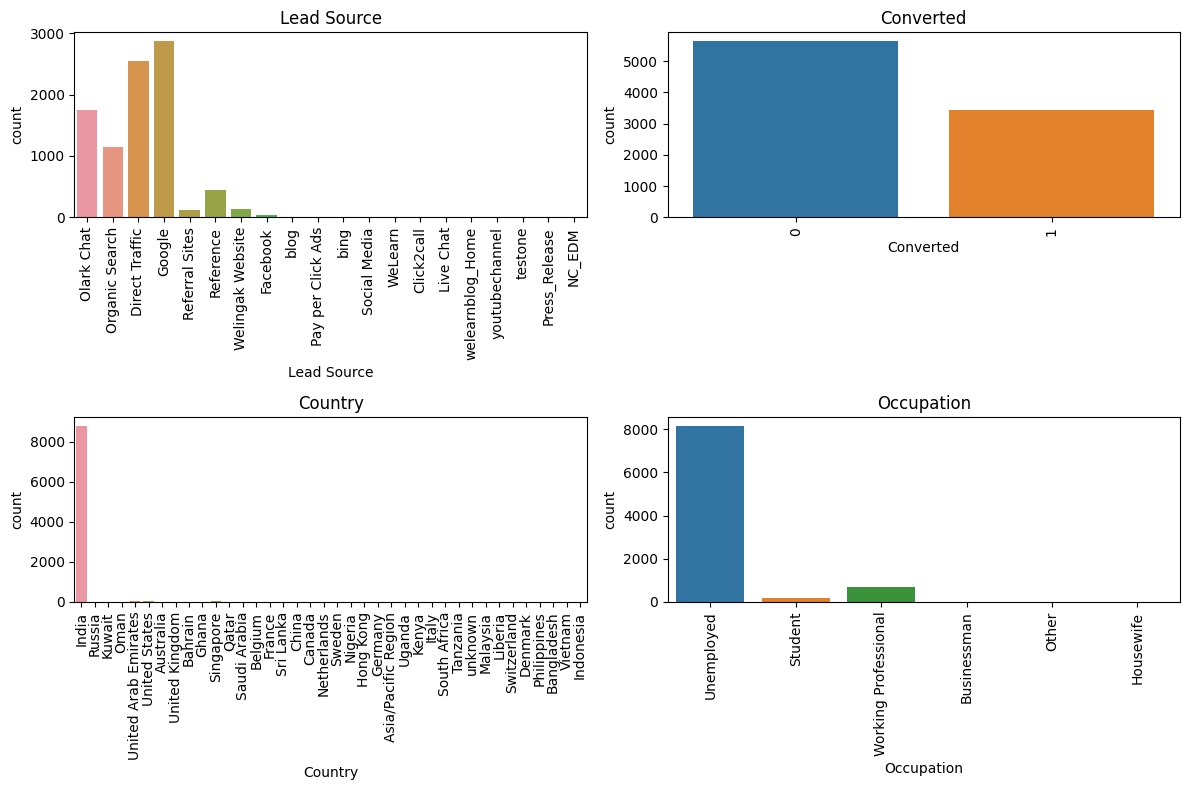

In [28]:
plt.figure(figsize=[12,8])

plt.subplot(2,2,1)
plt.title('Lead Source')
sns.countplot(data = lead_df, x='Lead Source')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
plt.title('Converted')
sns.countplot(data = lead_df, x='Converted')
plt.xticks(rotation = 90)

plt.subplot(2,2,3)
plt.title('Country')
sns.countplot(data = lead_df, x='Country')
plt.xticks(rotation = 90)

plt.subplot(2,2,4)
plt.title('Occupation')
sns.countplot(data = lead_df, x='Occupation')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

### Observation:
<pre>
Acoording to the observation of countplots, leads from Google and Direct Traffic are more likely to be interested in company's online 
cources than other sources.Indian people are more intrested in company's online cources as compared to other comapnies. Unemployed people 
are more likely to see the value in online courses.
Leads that have already converted are very less as compared to leads that are generated.

#### Univariate Analysis for Continuous Variables

In [29]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

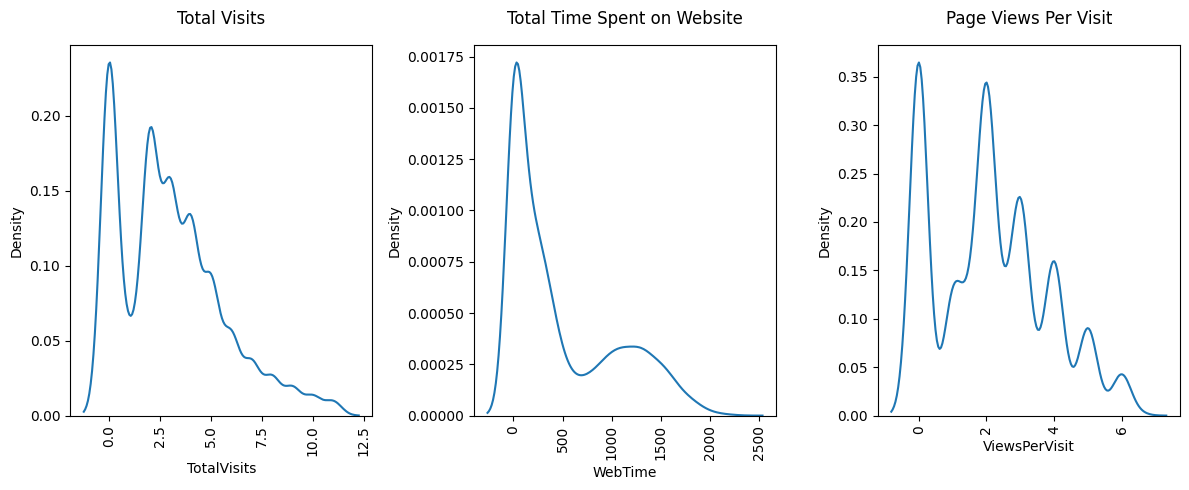

In [30]:
plt.figure(figsize=[12,5])

plt.subplot(1,3,1)
plt.title('Total Visits', pad=15)
Max_value = outlier_range(lead_df,'TotalVisits')
sns.distplot(lead_df[lead_df['TotalVisits'] <= Max_value].TotalVisits, hist=False)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
plt.title('Total Time Spent on Website', pad=15)
Max_value = outlier_range(lead_df,'WebTime')
sns.distplot(lead_df[lead_df['WebTime'] <= Max_value].WebTime, hist=False)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
plt.title('Page Views Per Visit', pad=15)
Max_value = outlier_range(lead_df,'ViewsPerVisit')
sns.distplot(lead_df[lead_df['ViewsPerVisit'] <= Max_value].ViewsPerVisit, hist=False)
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

#### Observation:
<pre>
According to the observation of distplots, clients are visiting very few times as well as not spending much time on website.

#### Bivariate Analysis for Categorical Variables

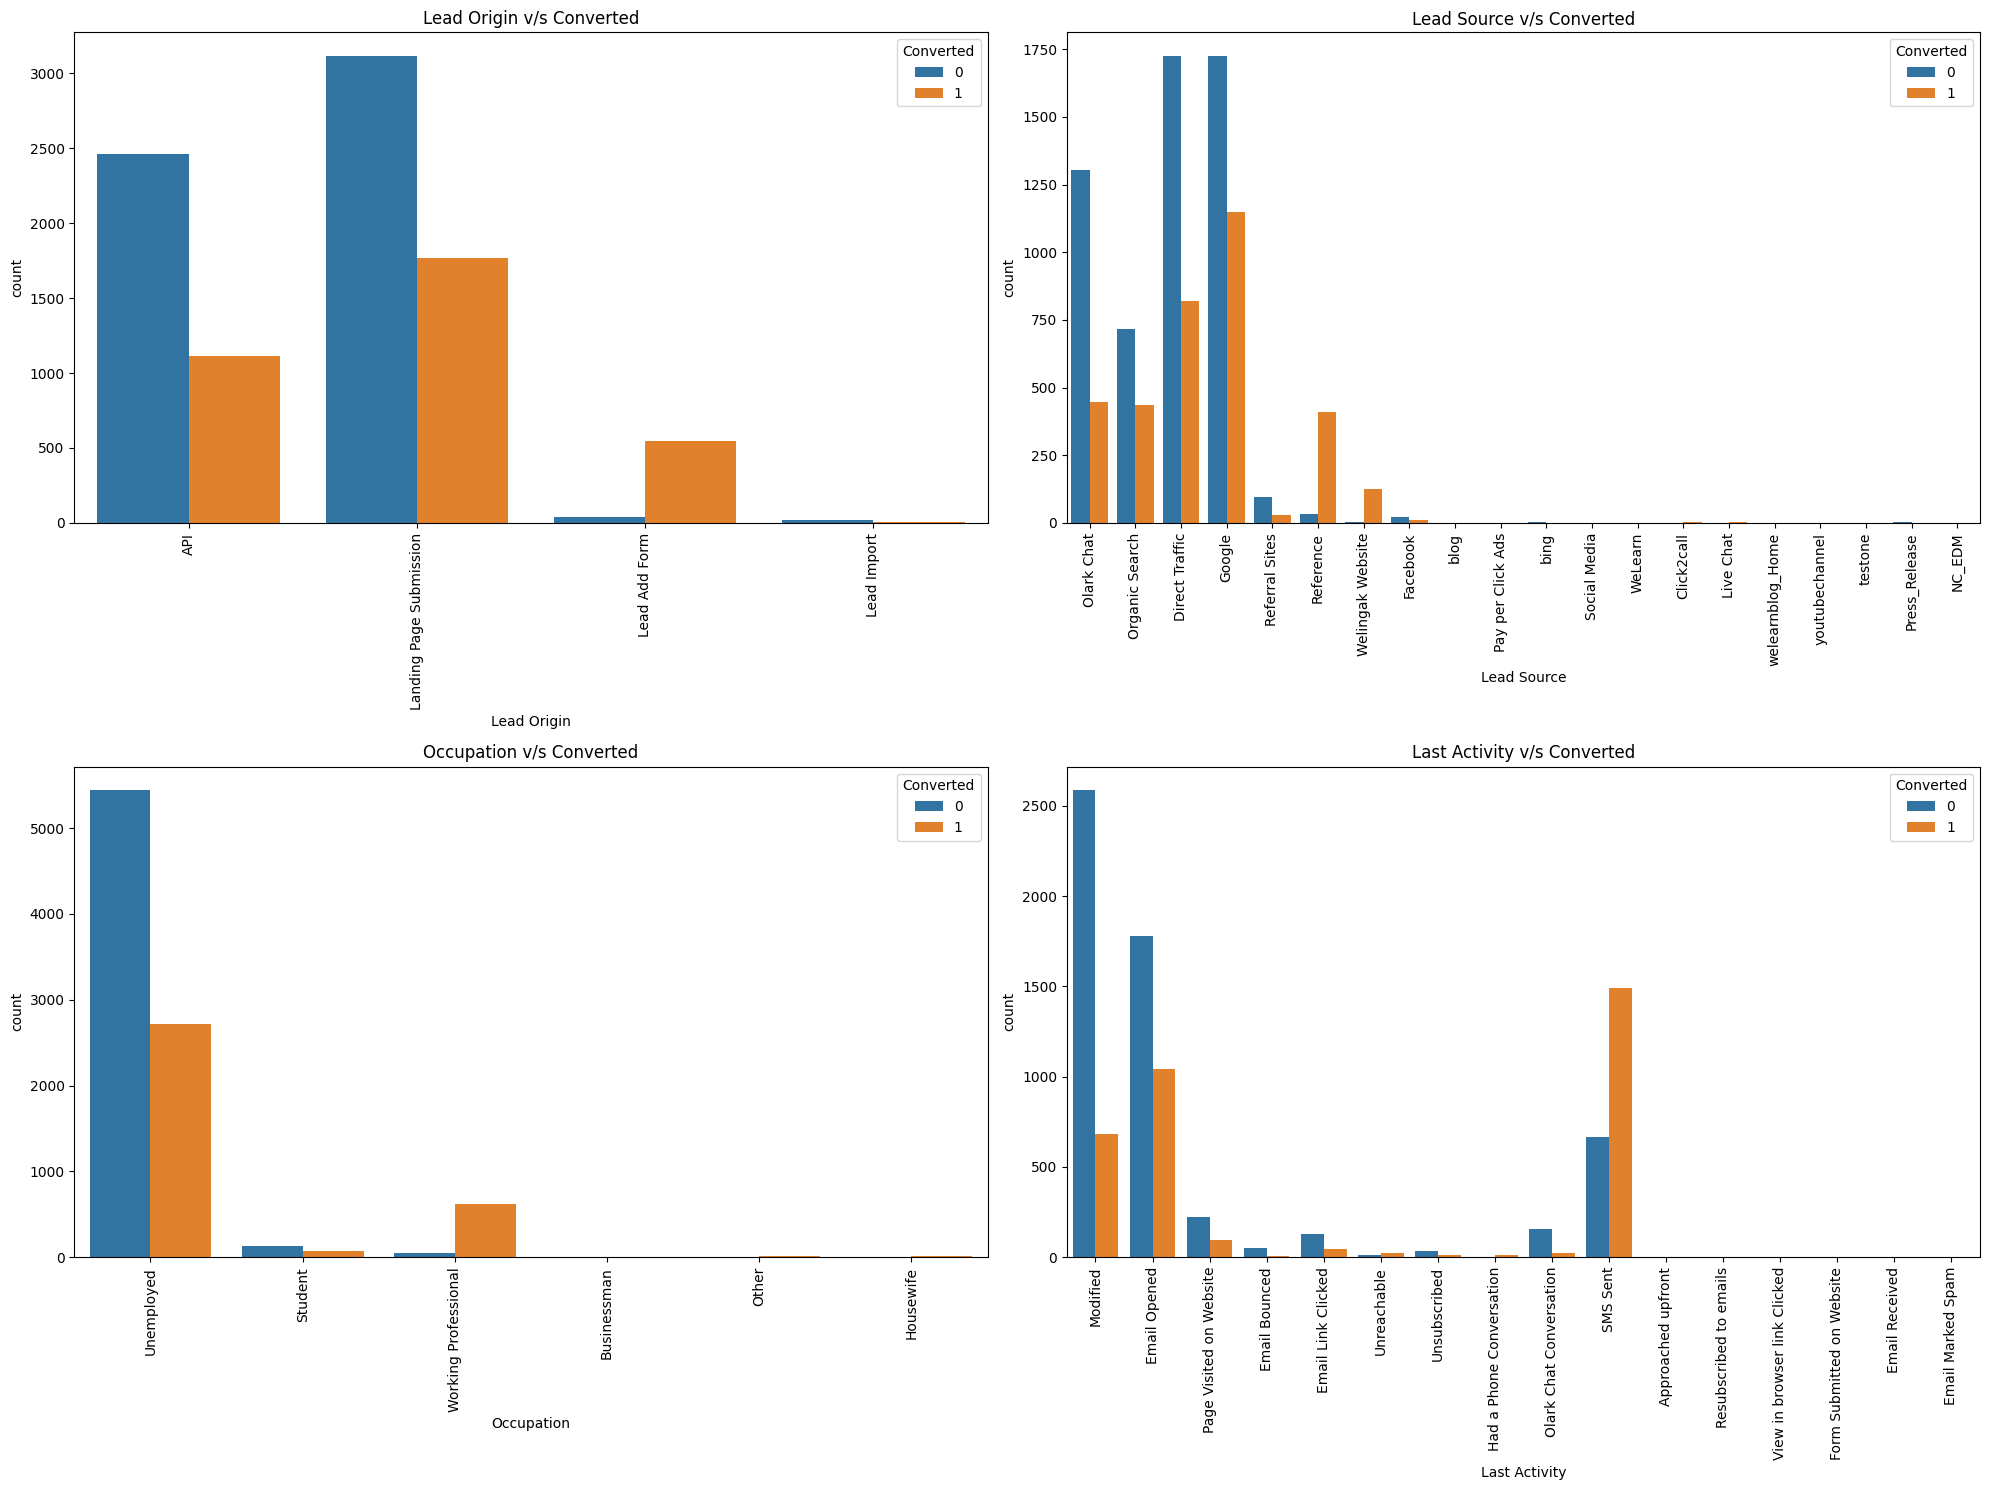

In [31]:
plt.figure(figsize = [20,15])

plt.subplot(2,2,1)
ax = sns.countplot(data=lead_df,x='Lead Origin',hue='Converted')
plt.title('Lead Origin v/s Converted')
plt.legend(title='Converted',loc='upper right')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
ax = sns.countplot(data=lead_df,x='Lead Source',hue='Converted')
plt.title('Lead Source v/s Converted')
plt.legend(title='Converted',loc='upper right')
plt.xticks(rotation = 90)

plt.subplot(2,2,3)
ax = sns.countplot(data=lead_df,x='Occupation',hue='Converted')
plt.title('Occupation v/s Converted')
plt.legend(title='Converted',loc='upper right')
plt.xticks(rotation = 90)

plt.subplot(2,2,4)
ax = sns.countplot(data=lead_df,x='Last Activity',hue='Converted')
plt.title('Last Activity v/s Converted')
plt.legend(title='Converted',loc='upper right')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

### Observation:
<pre>
According to the observation of countplots, API and Landing Page Submission have a conversion rate of 30-35%, but they account for a significant 
number of leads. Lead Add Form has a conversion rate of more than 90%, but it accounts for a much smaller number of leads. Google and Direct Traffic
generates maximum number of leads however, Google has better conversion rate as compare to Direct Traffic. Leads for Unemployed are higher however,its 
conversion rate is comparatively low. On the other hand, Leads for Working professionals are low however, its conversion rate is comparatively very high.
Leads are converted more by sending SMS to clients.

#### Bivariate Analysis for Continuous v/s Categorical Variables

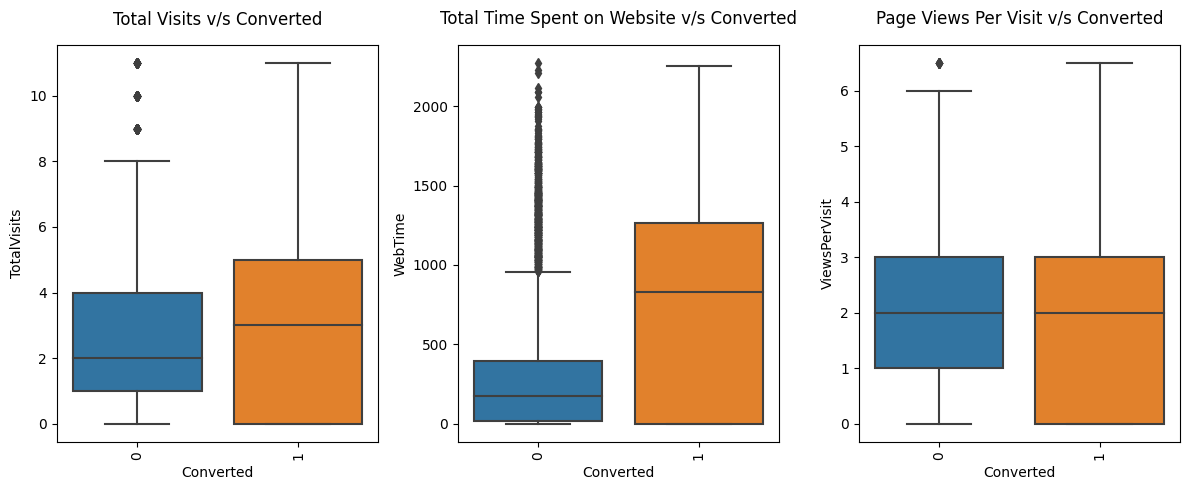

In [32]:
plt.figure(figsize=[12,5])

plt.subplot(1,3,1)
plt.title('Total Visits v/s Converted', pad=15)
Max_value = outlier_range(lead_df,'TotalVisits')
sns.boxplot(x = 'Converted', y =  lead_df[lead_df['TotalVisits'] <= Max_value].TotalVisits, data = lead_df)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
plt.title('Total Time Spent on Website v/s Converted', pad=15)
Max_value = outlier_range(lead_df,'WebTime')
sns.boxplot(x = 'Converted', y =  lead_df[lead_df['WebTime'] <= Max_value].WebTime, data = lead_df)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
plt.title('Page Views Per Visit v/s Converted', pad=15)
Max_value = outlier_range(lead_df,'ViewsPerVisit')
sns.boxplot(x = 'Converted', y =  lead_df[lead_df['ViewsPerVisit'] <= Max_value].ViewsPerVisit, data = lead_df)
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

### Observation:
<pre>
According to the observation of boxplots, Clients who spend more time on website, website visits are more likely to convert into leads.

In [33]:

lead_df = lead_df.drop(['Prospect ID','Lead Number','Country','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                        'Through Recommendations','MasteringInterviewCopy'], axis=1)

lead_df.shape

(9074, 10)

In [34]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Lead Origin    9074 non-null   object 
 1   Lead Source    9074 non-null   object 
 2   Mail Request   9074 non-null   object 
 3   Call Request   9074 non-null   object 
 4   Converted      9074 non-null   int64  
 5   TotalVisits    9074 non-null   float64
 6   WebTime        9074 non-null   int64  
 7   ViewsPerVisit  9074 non-null   float64
 8   Occupation     9074 non-null   object 
 9   Last Activity  9074 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.0+ MB


#### Step 4: Data Prepration

In [35]:
# Convert Binary variables (Yes/No) to 1/0

vars = ['Mail Request','Call Request']

def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

lead_df[vars] = lead_df[vars].apply(binary_map)

In [36]:
 # Create a dummy variable for the Categorical Variables and drop the first one.

dummy_df = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source','Occupation', 'Last Activity']], drop_first=True, dtype=int)
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Modified,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [37]:
# Concatinate the dummy_data to the lead_data dataframe

lead_df = pd.concat([lead_df, dummy_df], axis=1)

lead_df.head()

,Lead Origin,Lead Source,Mail Request,Call Request,Converted,TotalVisits,WebTime,ViewsPerVisit,Occupation,Last Activity,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Modified,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Unemployed,Modified,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Unemployed,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Student,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unemployed,Modified,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Unemployed,Modified,...,0,0,1,0,0,0,0,0,0,0


In [38]:
# Drop the columns for which we have created dummy variables

lead_df = lead_df.drop(['Lead Origin','Lead Source','Occupation','Last Activity'], axis=1)

lead_df.head()

,Mail Request,Call Request,Converted,TotalVisits,WebTime,ViewsPerVisit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Modified,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Step 5: Train-Test Split

In [39]:
# Put Response variable to y

y = lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [40]:
# Put Feature variable to X 

X = lead_df.drop(['Converted'], axis=1)
X.head()

,Mail Request,Call Request,TotalVisits,WebTime,ViewsPerVisit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Modified,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [41]:
# Split data into Train and Test set

X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [42]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)


X_train: (6351, 47)
y_train: (6351,)
X_test: (2723, 47)
y_test: (2723,)


In [43]:
# Rescale the feature with MinMaxscaler

scaler = MinMaxScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()
     

,Mail Request,Call Request,TotalVisits,WebTime,ViewsPerVisit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Modified,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
3009,0.0,0.0,0.007968,0.178347,0.083333,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1012,1.0,0.0,0.007968,0.085355,0.083333,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9226,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4750,0.0,0.0,0.007968,0.619946,0.083333,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7987,0.0,0.0,0.019920,0.711590,0.104167,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Statistical summary of X_train

X_train.describe()

,Mail Request,Call Request,TotalVisits,WebTime,ViewsPerVisit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Modified,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.078885,0.000315,0.013831,0.217585,0.099046,0.535979,0.068651,0.003779,0.278066,0.003936,...,0.000157,0.001889,0.359471,0.019052,0.034483,0.000157,0.244371,0.004094,0.004409,0.000157
std,0.269581,0.017744,0.020602,0.244868,0.087462,0.498743,0.252879,0.061362,0.448082,0.062622,...,0.012548,0.043430,0.479883,0.136719,0.182480,0.012548,0.429747,0.063857,0.066257,0.012548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.003984,0.004492,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.011952,0.110961,0.083333,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.019920,0.413522,0.138750,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 6: Model Building

In [45]:
# Feature selection using RFE

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [46]:
# List of selected variables 

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Mail Request', True, 1),
 ('Call Request', False, 4),
 ('TotalVisits', True, 1),
 ('WebTime', True, 1),
 ('ViewsPerVisit', False, 10),
 ('Lead Origin_Landing Page Submission', False, 23),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 5),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 27),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 22),
 ('Lead Source_NC_EDM', False, 13),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 18),
 ('Lead Source_Press_Release', False, 21),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 12),
 ('Lead Source_WeLearn', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 26),
 ('Lead Source_blog', False, 11),
 ('Lead Source_testone', False, 17),
 ('Lead Source_welearnblog_Home', False, 14),
 ('Lead Source_

In [47]:
# Columns where RFE support is True

col = X_train.columns[rfe.support_]
col

Index(['Mail Request', 'TotalVisits', 'WebTime', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Occupation_Housewife', 'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Modified',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed'],
      dtype='object')

In [48]:
# Columns where RFE support is False

X_train.columns[~rfe.support_]

Index(['Call Request', 'ViewsPerVisit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Occupation_Other', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails',
       'Last Activity_View in browser link Clicked'],
      dtype='object')

In [49]:
# Create function to calculate VIF.

def vif_calculation(boombikes):
  vif = pd.DataFrame()
  vif['Features'] = boombikes.columns
  vif['VIF'] = [variance_inflation_factor(boombikes.values, i) for i in range(boombikes.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  return vif

In [50]:
# Calculate VIF for Model 1

vif_calculation(X_train[col])

,Features,VIF
3,Lead Origin_Lead Add Form,62.70
7,Lead Source_Reference,48.00
9,Lead Source_Welingak Website,15.44
12,Occupation_Unemployed,6.65
5,Lead Source_Google,3.37
4,Lead Source_Direct Traffic,3.07
2,WebTime,2.37
15,Last Activity_Modified,2.07
6,Lead Source_Organic Search,2.02
17,Last Activity_SMS Sent,1.74


In [51]:
# Model 1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.6
Date:                Thu, 10 Aug 2023   Deviance:                       5303.3
Time:                        13:03:11   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3923
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [52]:
# Since VIF of 'Lead Origin_Lead Add Form' is very high, we can drop this column.

col = col.drop(['Lead Origin_Lead Add Form'])

In [53]:
# Recheck VIF for Model 2

vif_calculation(X_train[col])

,Features,VIF
11,Occupation_Unemployed,6.62
4,Lead Source_Google,3.36
3,Lead Source_Direct Traffic,3.06
2,WebTime,2.36
14,Last Activity_Modified,2.07
5,Lead Source_Organic Search,2.02
16,Last Activity_SMS Sent,1.74
1,TotalVisits,1.72
12,Occupation_Working Professional,1.67
6,Lead Source_Reference,1.38


In [54]:
# Rebuilding the Model 2 without 'Lead Origin_Lead Add Form'

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2652.8
Date:                Thu, 10 Aug 2023   Deviance:                       5305.7
Time:                        13:03:11   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3920
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [55]:
# Since VIF of 'Occupation_Unemployed' is very high, we can drop this column.

col = col.drop(['Occupation_Unemployed'])

In [56]:
# Check VIF for Model 3

vif_calculation(X_train[col])

,Features,VIF
2,WebTime,2.36
4,Lead Source_Google,2.21
3,Lead Source_Direct Traffic,2.03
1,TotalVisits,1.71
5,Lead Source_Organic Search,1.60
13,Last Activity_Modified,1.57
15,Last Activity_SMS Sent,1.54
0,Mail Request,1.21
11,Occupation_Working Professional,1.19
6,Lead Source_Reference,1.19


In [57]:
# Rebuilding the Model 3 without 'Lead Origin_Lead Add Form'

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.0
Date:                Thu, 10 Aug 2023   Deviance:                       5310.1
Time:                        13:03:12   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3916
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [58]:
# Since P-value of 'Occupation_Housewife' is very high, we can drop this column.

col = col.drop(['Occupation_Housewife'])

In [59]:
# Check VIF for Model 4

vif_calculation(X_train[col])

,Features,VIF
2,WebTime,2.36
4,Lead Source_Google,2.21
3,Lead Source_Direct Traffic,2.03
1,TotalVisits,1.71
5,Lead Source_Organic Search,1.59
12,Last Activity_Modified,1.57
14,Last Activity_SMS Sent,1.54
0,Mail Request,1.21
10,Occupation_Working Professional,1.19
6,Lead Source_Reference,1.18


In [60]:
# Rebuilding the Model 4 without 'Occupation_Housewife'

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm4.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2659.9
Date:                Thu, 10 Aug 2023   Deviance:                       5319.7
Time:                        13:03:12   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3907
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [61]:
# Since P-value of 'Occupation_Student' is very high, we can drop this column.

col = col.drop(['Occupation_Student'])

In [62]:
# Check VIF for Model 5

vif_calculation(X_train[col])

,Features,VIF
2,WebTime,2.36
4,Lead Source_Google,2.20
3,Lead Source_Direct Traffic,2.02
1,TotalVisits,1.71
5,Lead Source_Organic Search,1.59
11,Last Activity_Modified,1.57
13,Last Activity_SMS Sent,1.54
0,Mail Request,1.21
9,Occupation_Working Professional,1.19
6,Lead Source_Reference,1.18


In [63]:
# Rebuilding the Model 5 without 'Occupation_Student'

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm5.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2661.4
Date:                Thu, 10 Aug 2023   Deviance:                       5322.7
Time:                        13:03:12   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3904
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

<pre>
Since the P-values and VIF values of all the variables are in good range, logm5 is our final model. We have 16 variables in our final model.

In [64]:
# Make prediction on the train set

y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

3009    0.155520
1012    0.270941
9226    0.136539
4750    0.861866
7987    0.551098
1281    0.807119
2880    0.107914
4971    0.933329
7536    0.845434
1248    0.485430
dtype: float64

In [65]:
# Reshape into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15552039, 0.27094082, 0.13653893, 0.86186574, 0.5510978 ,
       0.80711867, 0.10791391, 0.93332928, 0.84543416, 0.48543008])

In [66]:
# Create a dataframe with the actual Converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.155520,3009
1,0,0.270941,1012
2,0,0.136539,9226
3,1,0.861866,4750
4,1,0.551098,7987


In [67]:
# Choose an arbitrary cut-off probability point of 0.5 to find the predicted labels

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.155520,3009,0
1,0,0.270941,1012,0
2,0,0.136539,9226,0
3,1,0.861866,4750,1
4,1,0.551098,7987,1


In [68]:
# Confusion Metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)

print(confusion)

[[3463  442]
 [ 748 1698]]


In [69]:
# Check overall Accuracy

print('The accuracy is',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

The accuracy is 0.812627932609038


In [70]:
# Check other Metrics

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [71]:
# Check Sensitivity

print('The sensitivity is', TP / float(TP+FN))

The sensitivity is 0.6941946034341783


In [72]:
# Check Specificity

print('The specificity is', TN / float(TN+FP))

The specificity is 0.8868117797695263


In [73]:
# Check False Positive Rate

print('False Positive Rate is', FP / float(TN+FP))

False Positive Rate is 0.11318822023047376


In [74]:
# Check Positive Predictive Value 

print('Positive Predictive Value is', TP / float(TP+FP))

Positive Predictive Value is 0.7934579439252336


In [75]:
# Check Negative Predictive Value

print ('Negative Predictive Value is',TN / float(TN+ FN))

Negative Predictive Value is 0.8223699833768701


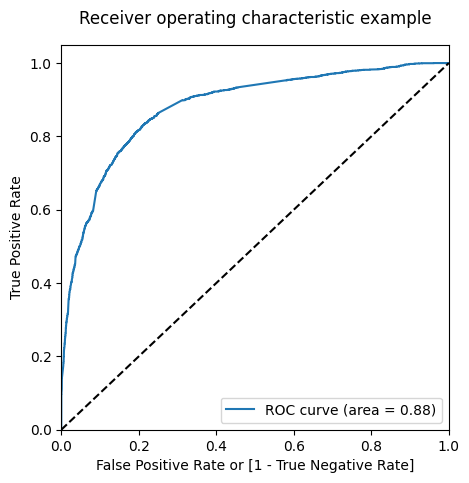

In [76]:
# Plot ROC curve to check the tradeoff between sensitivity and specificity

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example', pad=15)
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Observation:
<pre>
The AUC score of 0.89 indicates that our model is able to make accurate predictions with a high degree of confidence.

In [77]:
# Find Optimal Cut-off 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.155520,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.270941,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.136539,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.861866,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.551098,7987,1,1,1,1,1,1,1,0,0,0,0


In [78]:
# Calculate Accuracy, Sensitivity and Specificity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    Confusion_Matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total = sum(sum(Confusion_Matrix))
    Accuracy = (Confusion_Matrix[0,0]+Confusion_Matrix[1,1])/total
    
    Specificity = Confusion_Matrix[0,0]/(Confusion_Matrix[0,0]+Confusion_Matrix[0,1])
    Sensitivity = Confusion_Matrix[1,1]/(Confusion_Matrix[1,0]+Confusion_Matrix[1,1])
    cutoff_df.loc[i] =[ i , Accuracy, Sensitivity , Specificity]

print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.565423     0.968929     0.312676
0.2          0.2  0.754684     0.909240     0.657875
0.3          0.3  0.802866     0.836059     0.782074
0.4          0.4  0.812785     0.768602     0.840461
0.5          0.5  0.812628     0.694195     0.886812
0.6          0.6  0.792474     0.581766     0.924456
0.7          0.7  0.780192     0.511447     0.948528
0.8          0.8  0.759408     0.421504     0.971063
0.9          0.9  0.715635     0.280867     0.987964


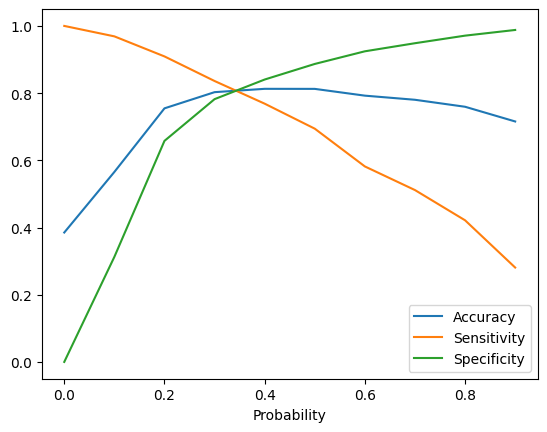

In [79]:
# Plot Accuracy, Sensitivity and Specificity for various probabilities

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

#### Observation:
<pre>
According to the plot, 0.33 is the optimum point to take it as a cutoff probability

In [80]:
# Final prediction using 0.33 as the cut off

y_train_pred_final['Final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,0.155520,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.270941,1012,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.136539,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.861866,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.551098,7987,1,1,1,1,1,1,1,0,0,0,0,1


In [81]:
# Calculate Lead Score

y_train_pred_final['Lead_score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted,Lead_score
0,0,0.155520,3009,0,1,1,0,0,0,0,0,0,0,0,0,16
1,0,0.270941,1012,0,1,1,1,0,0,0,0,0,0,0,0,27
2,0,0.136539,9226,0,1,1,0,0,0,0,0,0,0,0,0,14
3,1,0.861866,4750,1,1,1,1,1,1,1,1,1,1,0,1,86
4,1,0.551098,7987,1,1,1,1,1,1,1,0,0,0,0,1,55


In [82]:
# Check if 80% cases are correctly predicted based on the converted column.

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','Final_predicted']]
checking_df['Final_predicted'].value_counts()

Final_predicted
1    1999
0     447
Name: count, dtype: int64

In [83]:
# Check the precentage of Final_predicted conversions on test data

round(1999/float(1999+447),2)

0.82

<pre>
The final prediction of conversions have a target of 82% conversion as per the X Educations CEO's requirement

### Step 7 : Model Evaluation

In [84]:
# Check the overall accuracy

print('The Accuracy is',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted))

The Accuracy is 0.8068020784128483


In [85]:
# Confusion Matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_predicted )
confusion2

array([[3125,  780],
       [ 447, 1999]])

In [86]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [87]:
# Check Sensitivity

print('The sensitivity is', TP / float(TP+FN))

The sensitivity is 0.8172526573998364


In [88]:
# Check Specificity

print('The specificity is', TN / float(TN+FP))

The specificity is 0.8002560819462228


In [89]:
# Check False Positive Rate

print('False Positive Rate is', FP / float(TN+FP))

False Positive Rate is 0.1997439180537772


In [90]:
# Check Positive Predictive Value 

print('Positive Predictive Value is', TP / float(TP+FP))

Positive Predictive Value is 0.7193234976610291


In [91]:
# Check Negative Predictive Value

print ('Negative Predictive Value is',TN / float(TN+ FN))

Negative Predictive Value is 0.8748600223964166


In [92]:
# Confusion Metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)

print(confusion)

[[3463  442]
 [ 748 1698]]


In [93]:
# Check Precision

print('Precision score is',precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


Precision score is 0.7934579439252336


In [94]:
# Check Recall

print('Recall score is',recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Recall score is 0.6941946034341783


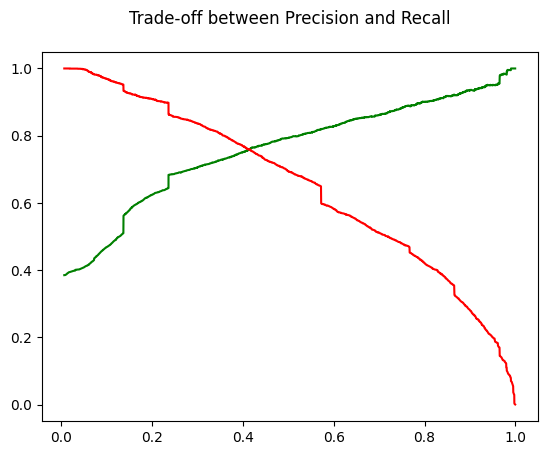

In [95]:
# Trade-off between Precision and Recall

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Plot a trade-off curve between precision and recall

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

plt.title('Trade-off between Precision and Recall', pad=20)
plt.show()

### Step 8: Making predictions on the test set

In [96]:
# Scale Test Data

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()
     

,Mail Request,Call Request,TotalVisits,WebTime,ViewsPerVisit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Modified,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
3271,0.0,0.0,0.054054,0.069102,0.072727,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1490,0.0,0.0,0.067568,0.665933,0.090909,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7936,0.0,0.0,0.027027,0.032570,0.036364,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4216,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3830,0.0,0.0,0.108108,0.072183,0.145455,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
# Assign the columns selected by the final model to the X_test 

X_test = X_test[col]
X_test.head()

,Mail Request,TotalVisits,WebTime,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Working Professional,Last Activity_Had a Phone Conversation,Last Activity_Modified,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
3271,0.0,0.054054,0.069102,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1490,0.0,0.067568,0.665933,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7936,0.0,0.027027,0.032570,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4216,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3830,0.0,0.108108,0.072183,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
# Add a const

X_test_sm = sm.add_constant(X_test)

# Make predictions on the test set

y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

3271    0.180596
1490    0.976794
7936    0.133968
4216    0.766936
3830    0.198491
1800    0.778956
6507    0.450965
4821    0.270003
4223    0.965283
4714    0.136539
dtype: float64

In [99]:
# Convert y_test_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
3271,0.180596
1490,0.976794
7936,0.133968
4216,0.766936
3830,0.198491


In [100]:
# Convert y_test to dataframe

y_test_df = pd.DataFrame(y_test)

# Put Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.180596
1,1,1490,0.976794
2,0,7936,0.133968
3,1,4216,0.766936
4,0,3830,0.198491


In [101]:
# Rename the column
 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

# Rearrange the columns

y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.180596
1,1490,1,0.976794
2,7936,0,0.133968
3,4216,1,0.766936
4,3830,0,0.198491


In [102]:
# Final prediction using 0.33 as the cut off

y_pred_final['Final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.33 else 0)

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Final_predicted
0,3271,0,0.180596,0
1,1490,1,0.976794,1
2,7936,0,0.133968,0
3,4216,1,0.766936,1
4,3830,0,0.198491,0


In [113]:
checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','Final_predicted']]
checking_test_df['Final_predicted'].value_counts()

Final_predicted
1    816
0    173
Name: count, dtype: int64

In [114]:
round(806/float(806+209),2)

0.79

In [103]:
# Check the overall accuracy

print('The Accuracy is',metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_predicted))

The Accuracy is 0.7855306647080426


In [104]:
# Confusion Matrix

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_predicted )
confusion2

array([[1323,  411],
       [ 173,  816]])

In [105]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [106]:
# Check Sensitivity

print('The sensitivity is', TP / float(TP+FN))

The sensitivity is 0.8250758341759353


In [107]:
# Check Specificity

print('The specificity is', TN / float(TN+FP))

The specificity is 0.7629757785467128


In [108]:
# Assign Lead Score to the Testing data

y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Final_predicted,Lead_Score
0,3271,0,0.180596,0,18
1,1490,1,0.976794,1,98
2,7936,0,0.133968,0,13
3,4216,1,0.766936,1,77
4,3830,0,0.198491,0,20


In [109]:
# Check Precision

print('Precision score is',precision_score(y_pred_final.Converted, y_pred_final.Final_predicted))


Precision score is 0.6650366748166259


In [110]:
# Check Recall

print('Recall score is',recall_score(y_pred_final.Converted, y_pred_final.Final_predicted))

Recall score is 0.8250758341759353


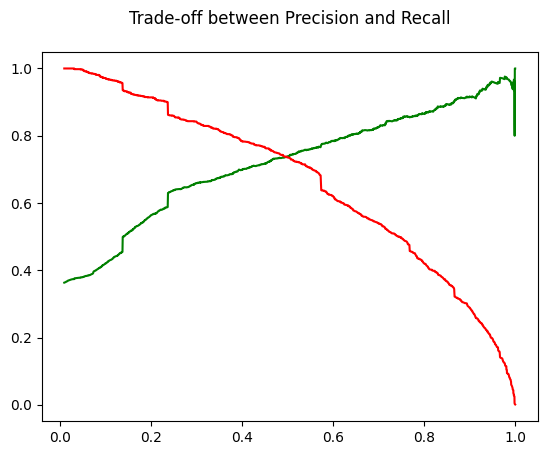

In [111]:
# Trade-off between Precision and Recall

p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_prob)

# Plot a trade-off curve between precision and recall

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

plt.title('Trade-off between Precision and Recall', pad=20)
plt.show()